<a href="https://colab.research.google.com/github/hamdansyaif/DeepLearning/blob/main/Week_4/IMDb_PyTorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### **Perbandingan RNN, LSTM, dan GRU pada Dataset IMDB**
1. Buat model Deep learning (PyTorch and Tensorflow). datasets import imdb, gunakan num_words = 30.000 - 50000 dan maxlen = 300 - 500. buat Kompleks model dengan banyak layer dan neuron.
2. Gunakan Matriks Evaluasi (Akurasi,Presisi,Recall,F1Squared, AUC, ROC). Visualisasikan matriks akurasi dan loss.
3. Beri penjelasan untuk setiap persamaan matematika yang ada.
4. Disarankan untuk mengerjakan tugas menggunakan Google Colab. Coba gunakan Google Colab dengan
     T4 GPU atau TPU agar proses pelatihan model menjadi lebih cepat.
5. Bandingkan hasil models RNN, LSTM, dan GRU. Buatlah analisa di format pdf

In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip --quiet
!{sys.executable} -m pip install torch torchvision torchtext scikit-learn matplotlib keras --quiet

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)


print("✅ Semua library PyTorch berhasil diimpor.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 143.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 165.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.3 MB/s eta 0:00:00
✅ Semua library PyTorch berhasil diimpor.

### Load Dataset

In [2]:
num_words = 50000
maxlen = 500
batch_size = 128

# Load dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Padding
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print('Train shape:', x_train.shape, 'Label train:', y_train.shape)
print('Test shape :', x_test.shape, 'Label test :', y_test.shape)

# Convert ke tensor PyTorch
x_train_tensor = torch.tensor(x_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Ubah ke torch.long untuk klasifikasi biner
x_test_tensor = torch.tensor(x_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)  # Ubah ke torch.long untuk klasifikasi biner

# Buat Dataset dan DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

print("✅ IMDb dataset siap digunakan untuk training PyTorch.")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (25000, 500) Label train: (25000,)
Test shape : (25000, 500) Label test : (25000,)
✅ IMDb dataset siap digunakan untuk training PyTorch.


### Kelas Dataset

In [3]:
from torch.utils.data import Dataset, DataLoader

class IMDBDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.LongTensor(X)
        self.y = torch.LongTensor(y)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = IMDBDataset(x_train, y_train)
test_dataset = IMDBDataset(x_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


### Model RNN

In [4]:
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embed_size=300, hidden_size=256, num_layers=3, dropout=0.4):
        super(RNNModel, self).__init__()

        # Layer embedding
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=0)

        # RNN Layer (Bidirectional, Multiple Layers)
        self.rnn = nn.RNN(embed_size, hidden_size, num_layers=num_layers,
                          batch_first=True, dropout=dropout, bidirectional=True)

        # Pooling Layer (Adaptive Max Pooling)
        self.pool = nn.AdaptiveMaxPool1d(1)

        # Fully connected layer untuk output
        self.fc = nn.Sequential(
            nn.Linear(hidden_size * 2, 128),  # Hidden size * 2 karena bidirectional
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Forward pass melalui embedding
        x = self.embedding(x)

        # Forward pass melalui RNN
        out, _ = self.rnn(x)

        # Mengubah bentuk output untuk pooling
        out = out.permute(0, 2, 1)  # Untuk Max Pooling
        out = self.pool(out).squeeze(2)

        # Forward pass ke Fully Connected layer
        return self.fc(out)


### Training RNN

In [5]:
def train_model(model, train_loader, test_loader, epochs=10):
    model.to(device)

    optimizer = optim.AdamW(model.parameters(), lr=2e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.9)
    criterion = nn.BCELoss()

    train_losses, val_losses, accs = [], [], []

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        # Melatih model
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            output = model(x_batch).squeeze(1)

            # Ubah y_batch menjadi float
            y_batch = y_batch.float()

            # Hitung loss
            loss = criterion(output, y_batch)

            # Backpropagation dan optimisasi
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        # Update learning rate scheduler
        scheduler.step()

        train_losses.append(total_loss / len(train_loader))

        # Evaluasi pada test set
        model.eval()
        val_loss = 0
        all_preds, all_labels = [], []

        with torch.no_grad():
            for x_batch, y_batch in test_loader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                output = model(x_batch).squeeze(1)

                # Ubah y_batch menjadi float
                y_batch = y_batch.float()

                # Hitung val loss
                val_loss += criterion(output, y_batch).item()

                # Prediksi
                preds = (output > 0.5).float()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(y_batch.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        accs.append(acc)
        val_losses.append(val_loss / len(test_loader))

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f} - Accuracy: {acc:.4f}")

    return train_losses, val_losses, accs, all_preds, all_labels


In [6]:
# Pastikan device (GPU atau CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Inisialisasi model
model = RNNModel(vocab_size=50000)  # Anda dapat menyesuaikan ukuran vocabulary sesuai kebutuhan

# Pelatihan model
train_losses, val_losses, accuracies, preds, targets = train_model(model, train_loader, test_loader, epochs=10)


Epoch 1/10 - Train Loss: 0.6797 - Val Loss: 0.6231 - Accuracy: 0.6673
Epoch 2/10 - Train Loss: 0.5684 - Val Loss: 0.5233 - Accuracy: 0.7496
Epoch 3/10 - Train Loss: 0.4729 - Val Loss: 0.4625 - Accuracy: 0.7912
Epoch 4/10 - Train Loss: 0.4006 - Val Loss: 0.4089 - Accuracy: 0.8134
Epoch 5/10 - Train Loss: 0.3320 - Val Loss: 0.3739 - Accuracy: 0.8328
Epoch 6/10 - Train Loss: 0.2780 - Val Loss: 0.3776 - Accuracy: 0.8369
Epoch 7/10 - Train Loss: 0.2356 - Val Loss: 0.3347 - Accuracy: 0.8583
Epoch 8/10 - Train Loss: 0.1964 - Val Loss: 0.3637 - Accuracy: 0.8559
Epoch 9/10 - Train Loss: 0.1677 - Val Loss: 0.3521 - Accuracy: 0.8615
Epoch 10/10 - Train Loss: 0.1425 - Val Loss: 0.3628 - Accuracy: 0.8616


### Visualisasi

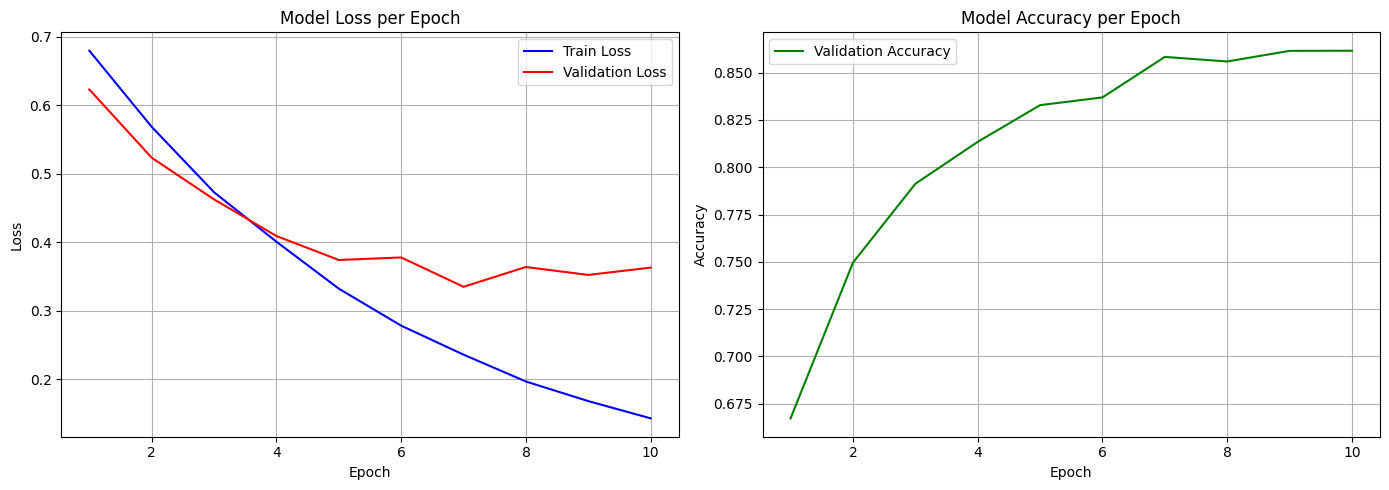

🔍 Evaluation Metrics:

              precision    recall  f1-score   support

         0.0     0.8702    0.8499    0.8599     12500
         1.0     0.8533    0.8732    0.8632     12500

    accuracy                         0.8616     25000
   macro avg     0.8618    0.8616    0.8615     25000
weighted avg     0.8618    0.8616    0.8615     25000

✅ Accuracy : 0.8616
✅ Precision: 0.8533
✅ Recall   : 0.8732
✅ F1 Score : 0.8632
✅ AUC      : 0.8616


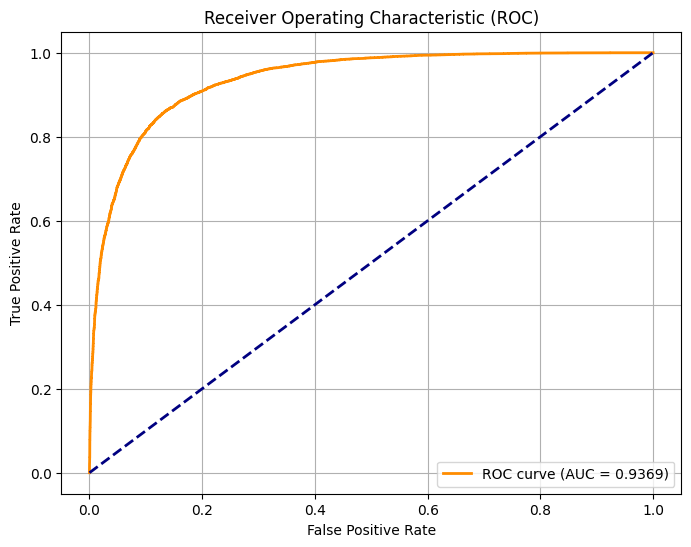

In [11]:
def plot_loss_accuracy(train_losses, val_losses, accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(14, 5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b-', label='Train Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title('Model Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracies, 'g-', label='Validation Accuracy')
    plt.title('Model Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_loss_accuracy(train_losses, val_losses, accuracies)
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(preds, targets):
    print("🔍 Evaluation Metrics:\n")
    print(classification_report(targets, preds, digits=4))

    acc = accuracy_score(targets, preds)
    prec = precision_score(targets, preds)
    rec = recall_score(targets, preds)
    f1 = f1_score(targets, preds)
    auc = roc_auc_score(targets, preds)

    print(f"✅ Accuracy : {acc:.4f}")
    print(f"✅ Precision: {prec:.4f}")
    print(f"✅ Recall   : {rec:.4f}")
    print(f"✅ F1 Score : {f1:.4f}")
    print(f"✅ AUC      : {auc:.4f}")

evaluate_model(preds, targets)
def plot_roc_curve(model, test_loader):
    model.eval()
    y_true = []
    y_probs = []

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch = x_batch.to(device)
            outputs = model(x_batch).squeeze(1).cpu()
            y_probs.extend(outputs.numpy())
            y_true.extend(y_batch.numpy())

    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

plot_roc_curve(model, test_loader)


## **Penjelasan Setiap Persamaan Matematika dalam RNN (Recurrent Neural Network)**

---

## 📘 **RNN: Recurrent Neural Network – Penjelasan Matematis**

RNN digunakan untuk memproses **data berurutan**, seperti teks, karena ia **mengingat informasi sebelumnya** saat memproses elemen baru.

---

### 🧠 **Struktur Dasar RNN**

Pada dasarnya, RNN memiliki **hidden state** yang diperbarui di setiap langkah waktu (time step). Berikut adalah persamaan dasarnya:

### 1. **Hidden State Update**:

$$
h_t = \tanh(W_{xh}x_t + W_{hh}h_{t-1} + b_h)
$$

**Penjelasan:**
- $ h_t $: hidden state saat waktu ke-**t**
- $ x_t $: input (kata) di waktu ke-**t**
- $ h_{t-1} $: hidden state sebelumnya
- $ W_{xh} $: bobot dari input ke hidden
- $ W_{hh} $: bobot dari hidden sebelumnya ke hidden sekarang
- $ b_h $: bias
- $ \tanh $: fungsi aktivasi non-linear

→ Hidden state ini akan "mengingat" informasi dari kata-kata sebelumnya.

---

### 2. **Output Layer**:

$$
\hat{y}_t = \sigma(W_{hy}h_t + b_y)
$$

**Penjelasan:**
- $ \hat{y}_t $: output prediksi
- $ W_{hy} $: bobot dari hidden ke output
- $ b_y $: bias output
- $ \sigma $: fungsi sigmoid (karena klasifikasi biner: positif/negatif)

---

### 3. **Loss Function: Binary Cross-Entropy (BCE)**

$
\mathcal{L} = - \frac{1}{N} \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]
$

**Penjelasan:**
- Digunakan untuk mengukur perbedaan antara label asli $ y_i $ dan prediksi $ \hat{y}_i $
- Semakin kecil loss-nya, semakin bagus prediksi model

---

### 4. **Backpropagation Through Time (BPTT)**

RNN dilatih menggunakan algoritma **Backpropagation Through Time**, yaitu **backpropagation** yang diterapkan sepanjang urutan waktu.

Tujuannya adalah menghitung turunan (gradien) dari loss terhadap setiap bobot, termasuk:

$
\frac{\partial \mathcal{L}}{\partial W_{xh}}, \quad \frac{\partial \mathcal{L}}{\partial W_{hh}}, \quad \frac{\partial \mathcal{L}}{\partial W_{hy}}
$

Kemudian digunakan untuk **mengupdate bobot** menggunakan algoritma optimisasi seperti Adam:

$
\theta \leftarrow \theta - \eta \cdot \frac{\partial \mathcal{L}}{\partial \theta}
$

Dengan:
- $ \theta $: semua parameter (weight & bias)
- $ \eta $: learning rate

---

### 5. **Pooling (Opsional)**

Model menggunakan:

```python
out = out.permute(0, 2, 1)
out = self.pool(out).squeeze(2)
```

Ini adalah **adaptive max pooling**, yang artinya dari semua hidden states per token, hanya diambil **nilai paling dominan (maksimum)**.

---

### 6. **Fully Connected Layer + Sigmoid**:

$
z = W_{fc} \cdot h + b
\quad
\hat{y} = \sigma(z)
$

→ Layer akhir dari model akan menghasilkan probabilitas antara 0 dan 1, dan digunakan untuk memprediksi label biner (positive/negative).

---

### Model LSTM

In [15]:
NUM_WORDS = 50000  # jumlah kata paling sering muncul
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(NUM_WORDS, 300, padding_idx=0)
        self.lstm = nn.LSTM(
            input_size=300,
            hidden_size=256,
            num_layers=3,
            batch_first=True,
            dropout=0.5,
            bidirectional=True
        )
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Sequential(
            nn.Linear(256 * 2, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.lstm(x)
        out = out.permute(0, 2, 1)  # (batch, hidden*2, seq_len)
        out = self.pool(out).squeeze(2)  # (batch, hidden*2)
        return self.fc(out)


### Fungsi Training

In [12]:
def train_model(model, train_loader, test_loader, epochs=10):
    model.to(device)
    optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.9)
    criterion = nn.BCELoss()

    train_losses, val_losses, accs = [], [], []
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device).float()
            output = model(x_batch).squeeze(1)
            loss = criterion(output, y_batch)
            optimizer.zero_grad()
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)  # menghindari exploding gradients
            optimizer.step()
            total_loss += loss.item()
        scheduler.step()
        train_losses.append(total_loss / len(train_loader))

        # Evaluate
        model.eval()
        val_loss = 0
        all_preds, all_labels = [], []
        with torch.no_grad():
            for x_batch, y_batch in test_loader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device).float()
                output = model(x_batch).squeeze(1)
                val_loss += criterion(output, y_batch).item()
                preds = (output > 0.5).float()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(y_batch.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        accs.append(acc)
        val_losses.append(val_loss / len(test_loader))
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f} - Accuracy: {acc:.4f}")

    return train_losses, val_losses, accs, all_preds, all_labels


In [ ]:
model = LSTMModel()
train_losses, val_losses, accuracies, preds, targets = train_model(model, train_loader, test_loader, epochs=10)


Epoch 1/10 - Train Loss: 0.5126 - Val Loss: 0.4107 - Accuracy: 0.8055
Epoch 2/10 - Train Loss: 0.3439 - Val Loss: 0.3587 - Accuracy: 0.8368
Epoch 3/10 - Train Loss: 0.2635 - Val Loss: 0.2864 - Accuracy: 0.8775
Epoch 4/10 - Train Loss: 0.2065 - Val Loss: 0.3166 - Accuracy: 0.8608
Epoch 5/10 - Train Loss: 0.1628 - Val Loss: 0.2777 - Accuracy: 0.8848
Epoch 6/10 - Train Loss: 0.1210 - Val Loss: 0.3114 - Accuracy: 0.8778
Epoch 7/10 - Train Loss: 0.0870 - Val Loss: 0.3631 - Accuracy: 0.8705
Epoch 8/10 - Train Loss: 0.0636 - Val Loss: 0.3436 - Accuracy: 0.8797
Epoch 9/10 - Train Loss: 0.0410 - Val Loss: 0.4183 - Accuracy: 0.8722


### Visualisasi dan Evaluasi

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(train_losses, val_losses, accuracies, preds, targets):
    # Konversi prediksi ke integer
    preds = np.array(preds)
    targets = np.array(targets)

    # Hitung metrik evaluasi
    acc = accuracy_score(targets, preds)
    prec = precision_score(targets, preds)
    rec = recall_score(targets, preds)
    f1 = f1_score(targets, preds)
    auc = roc_auc_score(targets, preds)

    print("\n📊 Evaluation Metrics:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"AUC       : {auc:.4f}")

    # Plot Train vs Val Loss
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss per Epoch')
    plt.legend()
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(accuracies, label='Validation Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy per Epoch')
    plt.legend()
    plt.grid(True)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(targets, preds)
    plt.subplot(1, 3, 3)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
evaluate_model(train_losses, val_losses, accuracies, preds, targets)

## Penjelasan matematika yang digunakan dalam implementasi **LSTM** di code

### 1. **Embedding Layer**
```python
self.embedding = nn.Embedding(NUM_WORDS, 300, padding_idx=0)
```
- **Fungsi**: Layer ini mengubah input teks yang berupa kata-kata (indeks kata) menjadi vektor berdimensi 300.
- **Matematika**:
  - Misalkan $ x_t $ adalah input kata pada timestep ke-$ t $.
  - Embedding layer mencari representasi vektornya dari matriks embedding $ E $ sehingga $ \mathbf{e}_t = E[x_t] $, dengan $ \mathbf{e}_t \in \mathbb{R}^{300} $.

---

### 2. **LSTM Layer**
```python
self.lstm = nn.LSTM(300, 256, num_layers=3, batch_first=True, dropout=0.4, bidirectional=True)
```
- **Fungsi**: LSTM mengolah urutan data dan mempertahankan konteks dari data yang lebih lama.
- **Matematika**:
  LSTM memiliki beberapa operasi internal yang terkait dengan **gerbang input**, **gerbang lupa**, **gerbang output**, dan **cell state**.

  - **Forget Gate** $ f_t $:
  $$
    f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
  $$
  $ f_t $ mengontrol informasi mana dari $ c_{t-1} $ (cell state sebelumnya) yang perlu dilupakan.

  - **Input Gate** $ i_t $:
  $$
  i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
  $$
  $ i_t $ mengontrol berapa banyak informasi baru yang akan ditambahkan ke dalam cell state.

  - **Candidate State** $ \tilde{c}_t $:
  $$
  \tilde{c}_t = \tanh(W_c \cdot [h_{t-1}, x_t] + b_c)
  $$
  Kandidat state ini berisi informasi baru yang akan disimpan jika diterima oleh **input gate**.

  - **Update Cell State** $ c_t $:
  $$
  c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t
  $$
  Cell state $ c_t $ diperbarui berdasarkan informasi yang dilupakan dan informasi baru yang diterima.

  - **Output Gate** $ o_t $:
  $$
  o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
  $$
  $ o_t $ mengontrol seberapa banyak informasi dari cell state $ c_t $ yang akan menjadi bagian dari output $ h_t $.

  - **Hidden State** $ h_t $:
  $$
  h_t = o_t \odot \tanh(c_t)
  $$
  Output dari LSTM adalah $ h_t $, yang dihitung berdasarkan $ c_t $ yang sudah diperbarui.

---

### 3. **Pooling Layer**
```python
out = out.permute(0, 2, 1)
out = self.pool(out).squeeze(2)
```
- **Fungsi**: Pooling dilakukan untuk menurunkan dimensi data dan menangkap fitur utama dari urutan.
- **Matematika**:
  - $ out $ berukuran $ (batch, seq\_len, feature\_dim) $.
  - Setelah dipermute, ukuran menjadi $ (batch, feature\_dim, seq\_len) $.
  - Pooling dilakukan untuk mendapatkan informasi yang paling signifikan, dengan cara memilih nilai maksimum di sepanjang dimensi waktu. Ini menghasilkan tensor ukuran $ (batch, feature\_dim, 1) $, yang kemudian di-squeeze untuk menjadi tensor berukuran $ (batch, feature\_dim) $.

---

### 4. **Fully Connected (FC) Layer**
```python
self.fc = nn.Sequential(
    nn.Linear(256 * 2, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 1),
    nn.Sigmoid()
)
```
- **Fungsi**: FC layer menghubungkan output dari LSTM ke output akhir yang akan diprediksi.
- **Matematika**:
  - Linear layer pertama:
  $$
  z = W \cdot x + b
  $$
  Dengan $ x $ sebagai input, $ W $ sebagai matriks bobot, dan $ b $ sebagai bias. Ini menghasilkan output dari linear transformation yang kemudian diteruskan ke fungsi aktivasi (ReLU).
  
  - Fungsi aktivasi ReLU:
  $$
  \text{ReLU}(x) = \max(0, x)
  $$
  
  - Dropout: Melakukan penghapusan acak (drop) sebagian neuron untuk mencegah overfitting.
  
  - Linear layer kedua:
  $$
  y = W_2 \cdot x + b_2
  $$
  Di sini, output dari layer pertama (yang sudah melalui ReLU) diproses lagi dengan FC layer untuk menghasilkan output skalar $ y $.

  - Sigmoid:
  $$
  \sigma(x) = \frac{1}{1 + e^{-x}}
  $$
  Digunakan untuk mengubah output menjadi probabilitas antara 0 dan 1.

---

Jadi, dalam kode LSTM, operasi matematika yang digunakan melibatkan:
1. **Embedding** untuk mengonversi kata menjadi vektor.
2. **LSTM layer** untuk menangkap dependensi jangka panjang dalam data urutan.
3. **Pooling** untuk menyaring informasi dan menurunkan dimensi.
4. **Fully Connected Layer** untuk menghasilkan output akhir dan melakukan klasifikasi biner dengan fungsi sigmoid.

### Model GRU

In [ ]:
class GRUModel(nn.Module):
    def __init__(self):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(NUM_WORDS, 300, padding_idx=0)  # Ensure NUM_WORDS is defined
        self.gru = nn.GRU(300, 256, num_layers=3, batch_first=True, dropout=0.4, bidirectional=True)
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Sequential(
            nn.Linear(256 * 2, 128),  # *2 because bidirectional GRU
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Sigmoid activation for binary classification
        )

    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.gru(x)
        out = out.permute(0, 2, 1)  # Reorder for pooling (batch, features, sequence)
        out = self.pool(out).squeeze(2)  # Pooling, result shape (batch, features)
        return self.fc(out)


### Training Model

In [ ]:
def train_model(model, train_loader, test_loader, epochs=10):
    model.to(device)
    optimizer = optim.AdamW(model.parameters(), lr=2e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.9)
    criterion = nn.BCELoss()

    train_losses, val_losses, accs = [], [], []
    all_preds, all_labels = [], []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            output = model(x_batch).squeeze(1)
            loss = criterion(output, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        scheduler.step()
        train_losses.append(total_loss / len(train_loader))

        # Evaluate on test set
        model.eval()
        val_loss = 0
        batch_preds, batch_labels = [], []

        with torch.no_grad():
            for x_batch, y_batch in test_loader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                output = model(x_batch).squeeze(1)
                val_loss += criterion(output, y_batch).item()
                preds = (output > 0.5).float()
                batch_preds.extend(preds.cpu().numpy())
                batch_labels.extend(y_batch.cpu().numpy())

        # Append predictions and labels for all epochs
        all_preds.extend(batch_preds)
        all_labels.extend(batch_labels)

        acc = accuracy_score(batch_labels, batch_preds)
        accs.append(acc)
        val_losses.append(val_loss / len(test_loader))
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f} - Accuracy: {acc:.4f}")

    return train_losses, val_losses, accs, all_preds, all_labels

### Visualisasi dan Evaluasi

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(train_losses, val_losses, accuracies, preds, targets):
    # Konversi prediksi ke integer
    preds = np.array(preds)
    targets = np.array(targets)

    # Hitung metrik evaluasi
    acc = accuracy_score(targets, preds)
    prec = precision_score(targets, preds)
    rec = recall_score(targets, preds)
    f1 = f1_score(targets, preds)
    auc = roc_auc_score(targets, preds)

    print("\n📊 Evaluation Metrics:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"AUC       : {auc:.4f}")

    # Plot Train vs Val Loss
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss per Epoch')
    plt.legend()
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(accuracies, label='Validation Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy per Epoch')
    plt.legend()
    plt.grid(True)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(targets, preds)
    plt.subplot(1, 3, 3)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
evaluate_model(train_losses, val_losses, accuracies, preds, targets)

### Persamaan matematikanya yang terdapat pada **GRU (Gated Recurrent Unit)** model dalam kode yang telah diberikan.

### 1. **Persamaan untuk LSTM/GRU pada Kode**

Di dalam kode tersebut, kita menggunakan **GRU**, yang merupakan jenis dari **Recurrent Neural Network (RNN)**, dan memiliki beberapa persamaan matematik yang menjelaskan proses komputasi yang terjadi di dalam GRU.

Berikut adalah persamaan matematika yang digunakan dalam **GRU**:

#### 1.1 **Proses GRU:**

Pada model GRU, ada beberapa komponen penting yang terlibat: **update gate** dan **reset gate**. Proses komputasinya bisa dijelaskan dengan dua persamaan utama:

- **Reset Gate**: Mengatur seberapa banyak informasi lama yang harus dilupakan.
- **Update Gate**: Mengatur seberapa banyak informasi baru yang harus diterima dan mengupdate informasi lama.

#### 1.2 **Persamaan Reset Gate dan Update Gate**

Berikut adalah persamaan matematika untuk **reset gate** dan **update gate** di GRU:

1. **Reset Gate (r)** dan **Update Gate (z)**:
   
   $$
   \mathbf{r}_t = \sigma(W_r \cdot [\mathbf{h}_{t-1}, \mathbf{x}_t] + b_r)
   $$
   $$
   \mathbf{z}_t = \sigma(W_z \cdot [\mathbf{h}_{t-1}, \mathbf{x}_t] + b_z)
   $$

   - $\mathbf{r}_t$ adalah **reset gate** pada waktu $t$.
   - $\mathbf{z}_t$ adalah **update gate** pada waktu $t$.
   - $W_r, W_z$ adalah bobot matriks untuk masing-masing gate.
   - $\sigma$ adalah fungsi aktivasi **sigmoid** yang mengatur output antara 0 dan 1.
   - $\mathbf{h}_{t-1}$ adalah output dari step sebelumnya.
   - $\mathbf{x}_t$ adalah input pada waktu $t$.
   - $b_r, b_z$ adalah bias untuk masing-masing gate.

2. **Hidden State Candidate $\tilde{\mathbf{h}}_t$**: Ini adalah kandidat output dari **GRU** berdasarkan input dan hidden state sebelumnya yang diperbarui oleh gate-reset:
   
   $$
   \tilde{\mathbf{h}}_t = \tanh(W_h \cdot [\mathbf{r}_t \odot \mathbf{h}_{t-1}, \mathbf{x}_t] + b_h)
   $$

   - $\tilde{\mathbf{h}}_t$ adalah **hidden state candidate** pada waktu $t$.
   - $\odot$ adalah operasi elemen-wise (produk Hadamard) antara **reset gate** ($\mathbf{r}_t$) dan **hidden state sebelumnya** ($\mathbf{h}_{t-1}$).
   - $W_h$ adalah bobot matriks untuk menghitung hidden state candidate.
   - $b_h$ adalah bias untuk hidden state candidate.

3. **Final Hidden State $ \mathbf{h}_t $**: Output akhir yang diperoleh dengan menggabungkan **update gate** dan **hidden state candidate**:

   $$
   \mathbf{h}_t = \mathbf{z}_t \odot \mathbf{h}_{t-1} + (1 - \mathbf{z}_t) \odot \tilde{\mathbf{h}}_t
   $$

   - $\mathbf{h}_t$ adalah **hidden state** pada waktu $t$, yaitu output dari GRU pada langkah $t$.
   - $\mathbf{z}_t$ adalah **update gate** pada waktu $t$.
   - $\odot$ adalah operasi elemen-wise.
   - Proses ini menggabungkan informasi dari **hidden state sebelumnya** ($\mathbf{h}_{t-1}$) dan **hidden state candidate** ($\tilde{\mathbf{h}}_t$) berdasarkan nilai **update gate** $\mathbf{z}_t$.

### 2. **Persamaan Model GRU Secara Keseluruhan**

Secara keseluruhan, **GRU** memiliki dua bagian utama dalam komputasinya: **reset gate** dan **update gate**, yang memungkinkan model ini untuk belajar kapan harus mengingat informasi lama dan kapan harus menerima informasi baru. Proses ini dinamis, dimana **update gate** mengontrol proporsi dari informasi lama yang dipertahankan ($\mathbf{h}_{t-1}$) dan informasi baru yang ditambahkan ke hidden state ($\tilde{\mathbf{h}}_t$).

- **Fungsi Aktivasi:**
   - $\sigma$ adalah fungsi aktivasi **sigmoid** untuk gate, menghasilkan nilai antara 0 dan 1.
   - $\tanh$ adalah fungsi aktivasi **tangent hyperbolic** yang digunakan untuk menghasilkan hidden state candidate.

### 3. **Alur Proses GRU pada Kode**

Pada kode yang diberikan, **GRU** digunakan dalam bagian `self.gru`:
```python
self.gru = nn.GRU(300, 256, num_layers=3, batch_first=True, dropout=0.4, bidirectional=True)
```

- **300**: Ukuran dimensi input (output dari embedding).
- **256**: Ukuran dimensi output hidden state GRU.
- **num_layers=3**: GRU memiliki tiga lapisan.
- **batch_first=True**: Menyatakan bahwa inputnya akan memiliki dimensi `(batch_size, sequence_length, input_size)`.
- **dropout=0.4**: Dropout diatur pada lapisan GRU untuk regularisasi.
- **bidirectional=True**: Menyatakan bahwa GRU bersifat **bidirectional**, artinya memproses input dari kedua arah (kiri ke kanan dan kanan ke kiri).

Pada langkah-langkah dalam kode, informasi yang diperoleh melalui GRU digunakan untuk menghitung prediksi di layer **fully connected** dengan memanfaatkan hasil dari **max pooling** untuk mereduksi dimensi.

### 4. **Ringkasan Persamaan untuk GRU dalam Kode**

1. **Reset Gate** ($\mathbf{r}_t$) dan **Update Gate** ($\mathbf{z}_t$):
   $$
   \mathbf{r}_t = \sigma(W_r \cdot [\mathbf{h}_{t-1}, \mathbf{x}_t] + b_r)
   $$
   $$
   \mathbf{z}_t = \sigma(W_z \cdot [\mathbf{h}_{t-1}, \mathbf{x}_t] + b_z)
   $$

2. **Hidden State Candidate** ($\tilde{\mathbf{h}}_t$):
   $$
   \tilde{\mathbf{h}}_t = \tanh(W_h \cdot [\mathbf{r}_t \odot \mathbf{h}_{t-1}, \mathbf{x}_t] + b_h)
   $$

3. **Final Hidden State** ($\mathbf{h}_t$):
   $$
   \mathbf{h}_t = \mathbf{z}_t \odot \mathbf{h}_{t-1} + (1 - \mathbf{z}_t) \odot \tilde{\mathbf{h}}_t
   $$
